In [1]:
from skimage.io import imread, imshow, imsave

In [2]:
img = imread('sample.jpg')

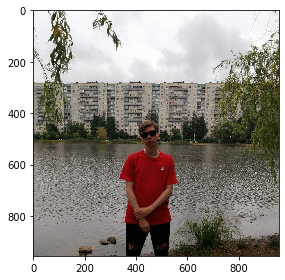

In [3]:
imshow(img);

In [4]:
img.shape

(956, 956, 3)

In [5]:
import numpy as np

In [6]:
r, g, b = np.dsplit(img, 3)

In [7]:
r.shape

(956, 956, 1)

In [8]:
r

array([[[242],
        [242],
        [242],
        ...,
        [235],
        [238],
        [238]],

       [[242],
        [242],
        [242],
        ...,
        [239],
        [241],
        [241]],

       [[242],
        [242],
        [242],
        ...,
        [239],
        [241],
        [242]],

       ...,

       [[120],
        [121],
        [121],
        ...,
        [ 54],
        [ 55],
        [ 56]],

       [[119],
        [120],
        [120],
        ...,
        [ 60],
        [ 61],
        [ 62]],

       [[118],
        [119],
        [119],
        ...,
        [ 53],
        [ 54],
        [ 55]]], dtype=uint8)

In [9]:
r[0]

array([[242],
       [242],
       [242],
       [242],
       [243],
       [243],
       [243],
       [243],
       [245],
       [245],
       [245],
       [244],
       [245],
       [245],
       [246],
       [246],
       [245],
       [245],
       [245],
       [245],
       [245],
       [245],
       [245],
       [245],
       [244],
       [244],
       [244],
       [244],
       [244],
       [244],
       [244],
       [244],
       [243],
       [244],
       [243],
       [243],
       [243],
       [244],
       [245],
       [245],
       [244],
       [244],
       [244],
       [244],
       [244],
       [244],
       [245],
       [245],
       [245],
       [245],
       [245],
       [244],
       [244],
       [243],
       [241],
       [240],
       [236],
       [251],
       [114],
       [ 83],
       [ 69],
       [ 80],
       [ 87],
       [190],
       [157],
       [142],
       [219],
       [247],
       [242],
       [254],
       [243],
      

In [10]:
sigma = 0.66

In [11]:
import math

In [12]:
half = round(3 * sigma)
k = half * 2 + 1

kernel = []
for i in reversed(range(-half, half + 1)):
    for j in range(-half, half + 1):
        kernel.append((j, i))
kernel = (np.array(kernel).reshape(k, k, 2)).tolist()
for i in range(k):
    for j in range(k):
        kernel[i][j] = 1 / (2 * math.pi * sigma ** 2) * \
        math.exp(- (kernel[i][j][0] ** 2 + kernel[i][j][1] ** 2) / (2 * sigma ** 2))
sum = np.array(kernel).sum()
for i in range(k):
    for j in range(k):
        kernel[i][j] = kernel[i][j] / sum

In [13]:
kernel

[[3.7534830879244845e-05,
  0.0011747322122455444,
  0.003702033540019216,
  0.0011747322122455444,
  3.7534830879244845e-05],
 [0.0011747322122455444,
  0.036765738333202104,
  0.11586299840446948,
  0.036765738333202104,
  0.0011747322122455444],
 [0.003702033540019216,
  0.11586299840446948,
  0.36512892186775553,
  0.11586299840446948,
  0.003702033540019216],
 [0.0011747322122455444,
  0.036765738333202104,
  0.11586299840446948,
  0.036765738333202104,
  0.0011747322122455444],
 [3.7534830879244845e-05,
  0.0011747322122455444,
  0.003702033540019216,
  0.0011747322122455444,
  3.7534830879244845e-05]]

In [14]:
k

5

In [15]:
from scipy.signal import convolve2d

In [16]:
r_gauss, g_gauss, b_gauss = [(convolve2d(i[: ,: , 0], kernel, mode='valid')).astype('uint8') for i in (r, g, b)]

In [17]:
img_gaussian = np.dstack((r_gauss, g_gauss, b_gauss))

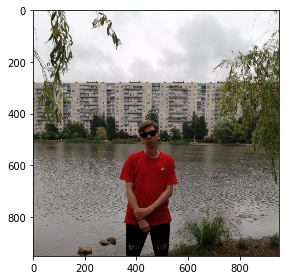

In [18]:
imshow(img_gaussian)

In [19]:
np.array_equal(img, img_gaussian)

False

In [20]:
imsave('sample-gaussian.jpg', img_gaussian)